# K nearest neighbors from scratch avec Python

## Importation des packages

In [ ]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import make_regression

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Création du jeu de données

In [ ]:
x_train , y_train = make_moons(100, noise=0.05, random_state=1)
x_test , y_test = make_moons(50, noise=0.12, random_state=1)

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[y_test==0][:, 0], x_test[y_test==0][:, 1], c='indigo')
plt.scatter(x_test[y_test==1][:, 0], x_test[y_test==1][:, 1], c='goldenrod')
plt.show()

## Implémentation du KNN classifier

### Initialisation de la classe

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

In [ ]:
knn = KNNClassifier(3)

print(knn.k)

### Entraînement du modèle

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

In [ ]:
knn = KNNClassifier(3)

knn.fit(x_train, x_test)

print(knn.explanatory_variable.shape)
print(knn.target_variable.shape)

### Calcul des distances

$$
d(a,b) = \sqrt {\sum ^n_{i=1} (a_i - b_i)^2}
$$


$a$ et $b$ sont deux points dans un plan euclidien de dimension $n$

$a_i$ et $b_i$ sont deux vecteurs depuis l'origine jusqu'au point $a$, $b$.

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

In [ ]:
knn = KNNClassifier(3)

np.random.seed(123)
a = np.random.random((100, 1))
b = np.random.random((100, 1))

KNNClassifier.euclidean_distance(a, b)

### Trouver les k plus proches voisins

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

  def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
    ''' Find the target value of the k nearest observations of the exemple x'''
    # Keep only the index of the k minimum distance
    k_min_index = np.argsort(x)[:self.k]
    # Return the target value of the k nearest neighbors
    return np.squeeze(self.target_variable[k_min_index])

In [ ]:
knn = KNNClassifier(5)

knn.fit(x_train, y_train)

distance_x_test_0 = list(map(lambda var : KNNClassifier.euclidean_distance(var, x_test[19, :]), knn.explanatory_variable))

k_nearest_target_value = knn.k_nearest_target_value(distance_x_test_0)

print(k_nearest_target_value)
print(y_test[19])

[1 0 0 0 0]
0


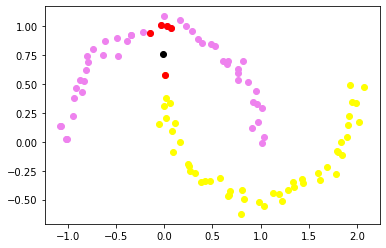

In [ ]:
k_rearest_neighbors = np.argsort(distance_x_test_0)[:knn.k]

plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')
plt.scatter(x_test[19, 0], x_test[19, 1], c='black')
plt.scatter(x_train[k_rearest_neighbors][:, 0], x_train[k_rearest_neighbors][:, 1], c='red')
plt.show()

### Retourner la classe la plus présente dans un vecteur

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

  def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
    ''' Find the target value of the k nearest observations of the exemple x'''
    # Keep only the index of the k minimum distance
    k_min_index = np.argsort(x)[:self.k]
    # Return the target value of the k nearest neighbors
    return np.squeeze(self.target_variable[k_min_index])

  @staticmethod
  def max_class(x: np.ndarray) -> np.ndarray:
    ''' Return the most frequent class value in the vector x'''
    count_class = Counter(x)
    return max(count_class, key=count_class.get)

In [ ]:
knn = KNNClassifier(5)

knn.fit(x_train, y_train)

distance_x_test_0 = list(map(lambda var : KNNClassifier.euclidean_distance(var, x_test[19, :]), knn.explanatory_variable))

k_nearest_target_value = knn.k_nearest_target_value(distance_x_test_0)

print(k_nearest_target_value)

prediction = KNNClassifier.max_class(k_nearest_target_value)

print(prediction)

[1 0 0 0 0]
0


### Prédiction de la classe pour un exemple

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

  def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
    ''' Find the target value of the k nearest observations of the exemple x'''
    # Keep only the index of the k minimum distance
    k_min_index = np.argsort(x)[:self.k]
    # Return the target value of the k nearest neighbors
    return np.squeeze(self.target_variable[k_min_index])

  @staticmethod
  def max_class(x: np.ndarray) -> np.ndarray:
    ''' Return the most frequent class value in the vector x'''
    count_class = Counter(x)
    return max(count_class, key=count_class.get)

  def predict_class(self, x: np.ndarray) -> int:
    ''' Predict the average of the k nearest target '''
    # Compute the distance for every observations of our training dataset
    distance_matrix = list(map(lambda var : KNNClassifier.euclidean_distance(x, var), self.explanatory_variable))
    # Keep only the target value of the k nearest neighbors
    k_target = self.k_nearest_target_value(distance_matrix)
    # Return the most frequent target value
    return KNNClassifier.max_class(k_target)

In [ ]:
knn = KNNClassifier(5)

knn.fit(x_train, y_train)

prediction = knn.predict_class(x_test[19, :])

print(prediction)

0


### Faire la prédiction pour un jeu de test complet

In [ ]:
class KNNClassifier:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

  def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
    ''' Find the target value of the k nearest observations of the exemple x'''
    # Keep only the index of the k minimum distance
    k_min_index = np.argsort(x)[:self.k]
    # Return the target value of the k nearest neighbors
    return np.squeeze(self.target_variable[k_min_index])

  @staticmethod
  def max_class(x: np.ndarray) -> np.ndarray:
    ''' Return the most frequent class value in the vector x'''
    count_class = Counter(x)
    return max(count_class, key=count_class.get)

  def predict_class(self, x: np.ndarray) -> int:
    ''' Predict the average of the k nearest target '''
    # Compute the distance for every observations of our training dataset
    distance_matrix = list(map(lambda var : KNNClassifier.euclidean_distance(x, var), self.explanatory_variable))
    # Keep only the target value of the k nearest neighbors
    k_target = self.k_nearest_target_value(distance_matrix)
    # Return the most frequent target value
    return KNNClassifier.max_class(k_target)

  def predict(self, x: np.ndarray) -> np.ndarray:
    ''' Make predict of all the x dataset '''
    return np.array(list(map(lambda var : self.predict_class(var), x)))

In [ ]:
knn = KNNClassifier(3)

knn.fit(x_train, y_train)

prediction = knn.predict(x_test)

print(np.array(prediction).shape)

(50,)


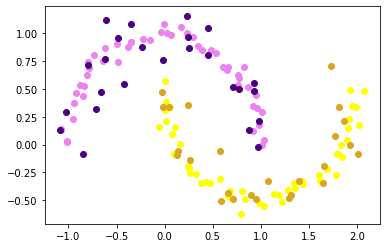

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[prediction==0][:, 0], x_test[prediction==0][:, 1], c='indigo')
plt.scatter(x_test[prediction==1][:, 0], x_test[prediction==1][:, 1], c='goldenrod')
plt.show()

In [ ]:
accuracy_score(prediction, y_test)

1.0

# Pour la régression

### Implémentation de la classe knn_regressor

In [ ]:
class KNNRegressor:

  def __init__(self, k: int):
    ''' Initialization function '''
    self.k = k

  def fit(self, x: np.ndarray, y: np.ndarray):
    ''' Training of the model which consist to save the train dataset'''
    self.explanatory_variable = x
    self.target_variable = y

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray):
    ''' Compute the euclidean distance between two vectors '''
    return np.sqrt(np.sum(np.square(a-b)))

  def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
    ''' Find the target value of the k nearest observations of the exemple x'''
    # Keep only the index of the k minimum distance
    k_min_index = np.argsort(x)[:self.k]
    # Return the target value of the k nearest neighbors
    return np.squeeze(self.target_variable[k_min_index])

  def predict_average(self, x: np.ndarray) -> float:
    ''' Predict the average of the k nearest target '''
    # Compute the distance for every observations of our training dataset
    distance_matrix = list(map(lambda var : KNNRegressor.euclidean_distance(x, var), self.explanatory_variable))
    # Keep only the target value of the k nearest neighbors
    k_target = self.k_nearest_target_value(distance_matrix)
    # Return the average target value
    return np.mean(k_target)


  def predict(self, x: np.ndarray) -> np.ndarray:
    ''' Make predict of all the x dataset '''
    return np.array(list(map(lambda var : self.predict_average(var), x)))

### Génération du jeu d'entraînement

In [ ]:
x_train, y_train = make_regression(50, n_features=1, noise=10, random_state=123)
x_test, y_test = make_regression(25, n_features=1, noise=10, random_state=123)

Visualisation des données

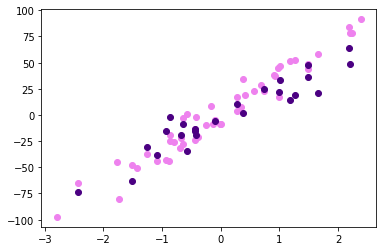

In [ ]:
plt.scatter(x_train, y_train, c='violet')
plt.scatter(x_test, y_test, c='indigo')
plt.show()

In [ ]:
knn = KNNRegressor(3)

knn.fit(x_train, y_train)

prediction = knn.predict(x_test)

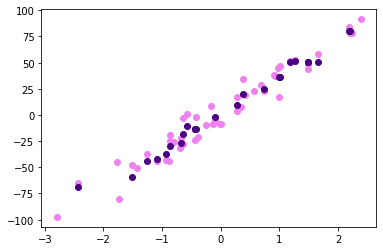

In [ ]:
plt.scatter(x_train, y_train, c='violet')
plt.scatter(x_test, prediction, c='indigo')
plt.show()

In [ ]:
r2_score(prediction, y_test)

0.8314633361114572